# Time Series Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Milk Datset

In [3]:
milk = pd.read_csv("./Datasets/monthly-milk-production-pounds-p.csv", index_col=0)
milk.head()

,Milk
Month,
1962-01,589
1962-02,561
1962-03,640
1962-04,656
1962-05,727


In [4]:
milk.index = pd.to_datetime(milk.index).to_period("M")

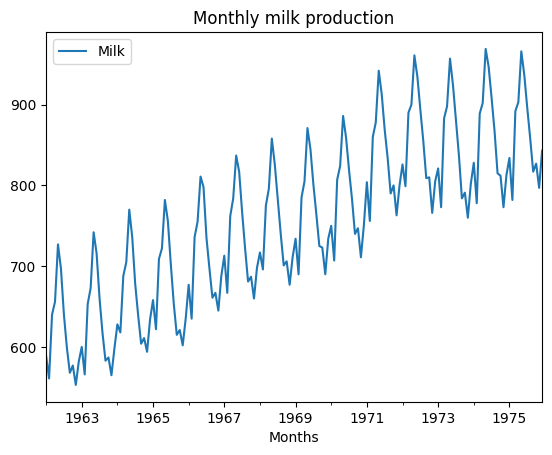

In [6]:
milk.plot()
plt.title("Monthly milk production")
plt.xlabel("Months")
plt.show()

### Downsampling

In [7]:
downsampled = milk.resample('Q').sum()
downsampled.index.rename('Quarter', inplace=True)

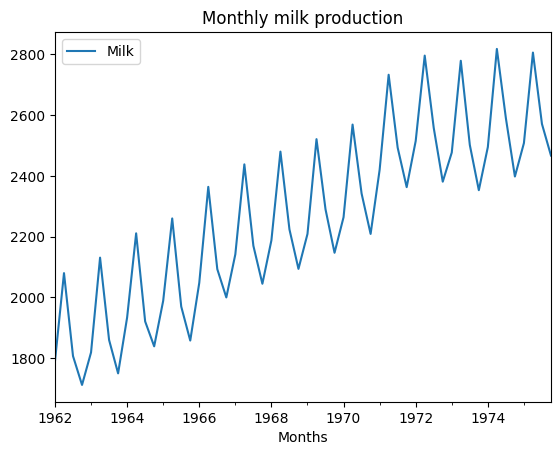

In [10]:
downsampled.plot()
plt.title("Monthly milk production")
plt.xlabel("Months")
plt.show()

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

### Seasonal Decompose

In [12]:
milk = pd.read_csv("./Datasets/monthly-milk-production-pounds-p.csv")

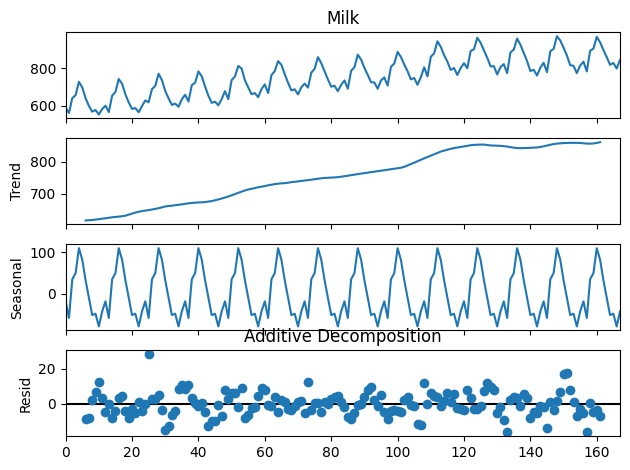

In [17]:
series = milk['Milk']
result = seasonal_decompose(series, model='additive', period=12)
result.plot()
plt.title("Additive Decomposition")
plt.show()

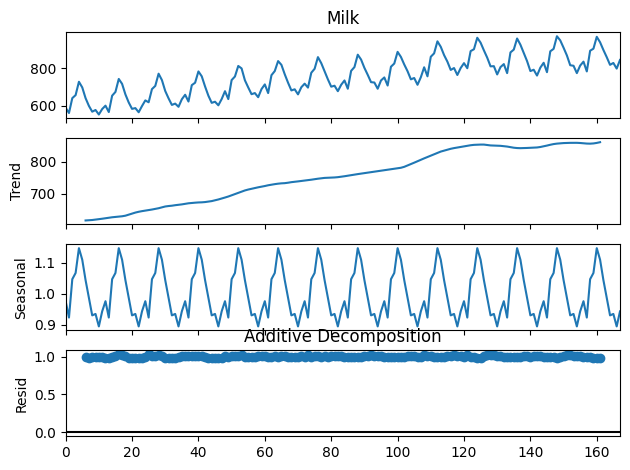

In [18]:
series = milk['Milk']
result = seasonal_decompose(series, model='multiplicative', period=12)
result.plot()
plt.title("Additive Decomposition")
plt.show()

## Shampoo Dataset

In [19]:
shampoo = pd.read_csv("./Datasets/sales-of-shampoo-over-a-three-ye.csv")
shampoo.head()

,Month,Sales of shampoo over a three year period
0,2001-01-01,266.0
1,2001-02-01,145.9
2,2001-03-01,183.1
3,2001-04-01,119.3
4,2001-05-01,180.3


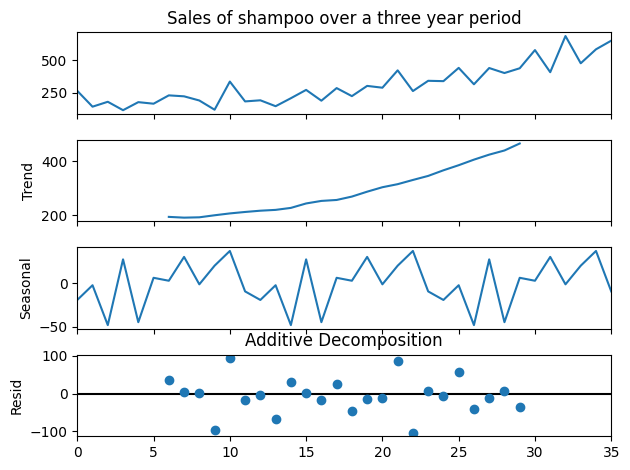

In [20]:
series = shampoo['Sales of shampoo over a three year period']
result = seasonal_decompose(series, model='additive', period=12)
result.plot()
plt.title("Additive Decomposition")
plt.show()

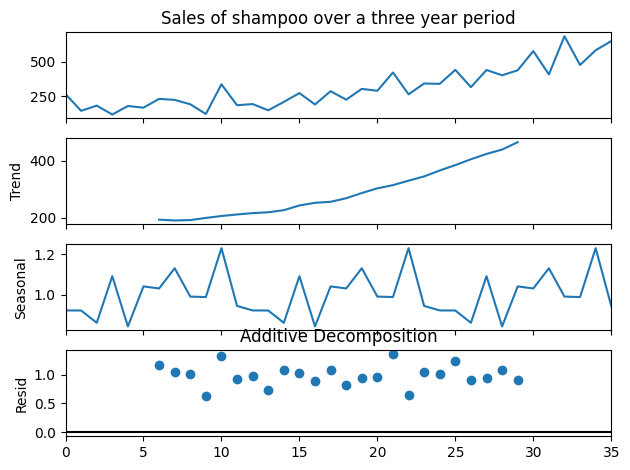

In [21]:
series = shampoo['Sales of shampoo over a three year period']
result = seasonal_decompose(series, model='multiplicative', period=12)
result.plot()
plt.title("Additive Decomposition")
plt.show()

## Milk Dataset

In [26]:
from sklearn.metrics import mean_squared_error
from numpy import sqrt


In [27]:
y = milk['Milk']

In [38]:
y_train = y.iloc[:-12]
y_test = y.iloc[-12:]
y_test.shape, y_train.shape

((12,), (156,))

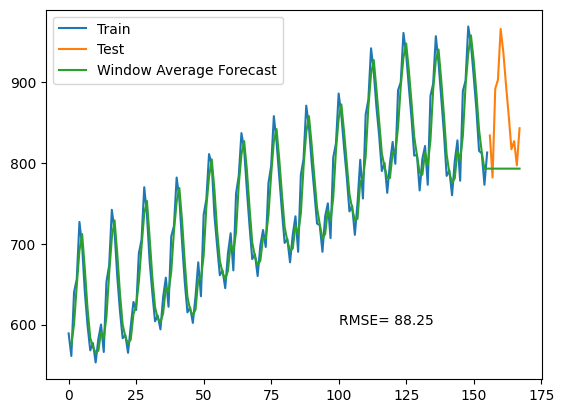

In [39]:
span = 2
fcast = y_train.rolling(span).mean()
MA = fcast.iloc[-1]
MA_series = pd.Series(MA.repeat(len(y_test)))
MA_fcast = pd.concat([fcast, MA_series], ignore_index=True)
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(MA_fcast, label = 'Window Average Forecast')
rmse = sqrt(mean_squared_error(y_test, MA_series))
plt.text(100,600,'RMSE= '+ str(np.round(rmse,2)))
plt.legend(loc='best')
plt.show()

### Centered Rolling Mean

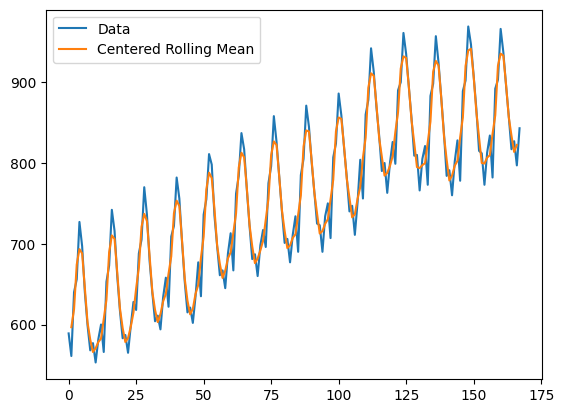

In [43]:
span = 3
fcast = y.rolling(span, center=True).mean()
plt.plot(y, label = 'Data')
plt.plot(fcast, label = 'Centered Rolling Mean')
plt.legend(loc='best')
plt.show()

## Simple Expnential Smoothening

In [45]:
from statsmodels.tsa.api import SimpleExpSmoothing

In [47]:
milk = pd.read_csv("./Datasets/monthly-milk-production-pounds-p.csv")
y = milk['Milk']
y_train = y.iloc[:-12]
y_test = y.iloc[-12:]
y_test.shape, y_train.shape

((12,), (156,))

c:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\envs\dung\lib\site-packages\pandas\util\_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


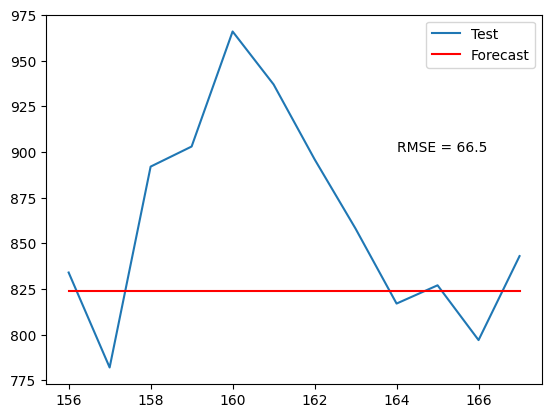

In [50]:
alpha = 0.3
ses = SimpleExpSmoothing(y_train)
fit1 = ses.fit(smoothing_level=alpha)
fcast1 = fit1.forecast(len(y_test))
y_test.plot(label ='Test')
fcast1.plot(color='red', label='Forecast')
rmse = sqrt(mean_squared_error(y_test, fcast1))
plt.text(164,900,"RMSE = "+ str(np.round(rmse,2)))
plt.legend(loc='best')
plt.show()

In [51]:
from statsmodels.tsa.api import SimpleExpSmoothing, Holt, ExponentialSmoothing


## Holt's Linear trend

c:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\envs\dung\lib\site-packages\pandas\util\_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


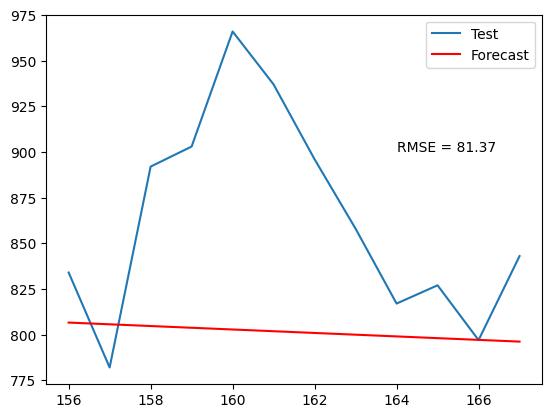

In [52]:
alpha, beta = 0.5,0.02
holt = Holt(y_train)
fit1 = holt.fit(smoothing_level=alpha, smoothing_trend=beta)
fcast1 = fit1.forecast(len(y_test))
y_test.plot(label ='Test')
fcast1.plot(color='red', label='Forecast')
rmse = sqrt(mean_squared_error(y_test, fcast1))
plt.text(164,900,"RMSE = "+ str(np.round(rmse,2)))
plt.legend(loc='best')
plt.show()

## Holt Winter's Additive Method

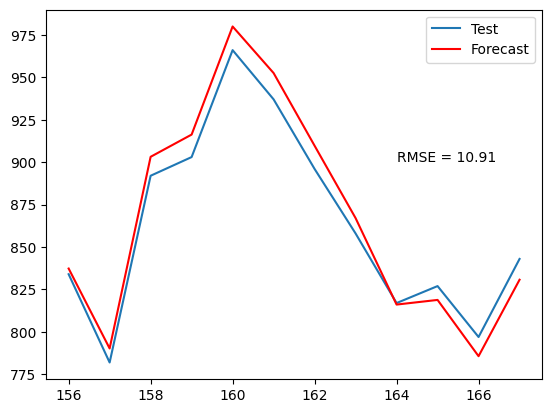

In [53]:
alpha, beta, gamma = 0.5,0.02,0.6
hw = ExponentialSmoothing(y_train, seasonal_periods=12, trend='add', seasonal='add')
fit1 = hw.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma)
fcast1 = fit1.forecast(len(y_test))
y_test.plot(label ='Test')
fcast1.plot(color='red', label='Forecast')
rmse = sqrt(mean_squared_error(y_test, fcast1))
plt.text(164,900,"RMSE = "+ str(np.round(rmse,2)))
plt.legend(loc='best')
plt.show()

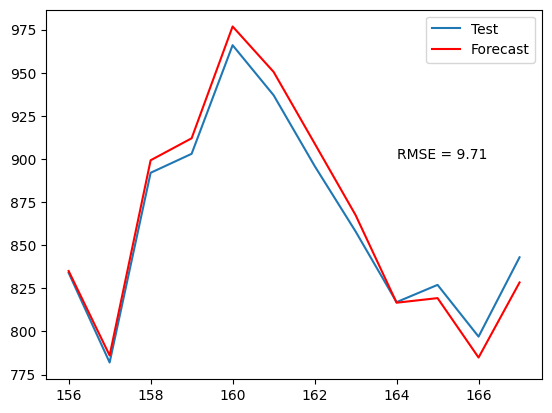

In [57]:
alpha, beta, gamma = 0.5,0.02,0.6
hw = ExponentialSmoothing(y_train, seasonal_periods=12, trend='add', seasonal='mul')
fit1 = hw.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma)
fcast1 = fit1.forecast(len(y_test))
y_test.plot(label ='Test')
fcast1.plot(color='red', label='Forecast')
rmse = sqrt(mean_squared_error(y_test, fcast1))
plt.text(164,900,"RMSE = "+ str(np.round(rmse,2)))
plt.legend(loc='best')
plt.show()

In [77]:
df = pd.read_csv("./Datasets/monthly-traffic-fatalities-in-on.csv", sep=';')
df.head()

,Month,fatalities
0,1960-01,61
1,1960-02,65
2,1960-03,55
3,1960-04,56
4,1960-05,91


In [78]:
y = df['fatalities']
y_train = y.iloc[:-12]
y_test = y.iloc[-12:]

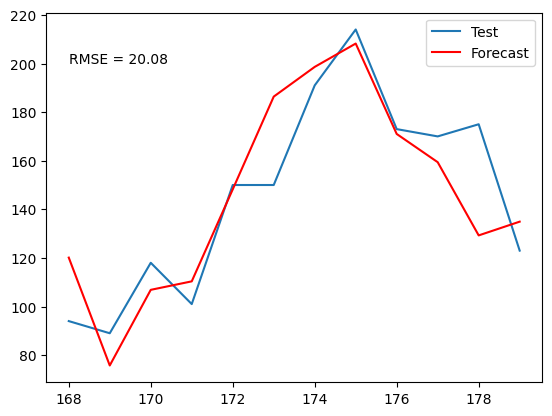

In [86]:
alpha, beta, gamma = 0.6,0.2,0.6
hw = ExponentialSmoothing(y_train, seasonal_periods=12, trend='add', seasonal='mul')
fit1 = hw.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma)
fcast1 = fit1.forecast(len(y_test))
y_test.plot(label ='Test')
fcast1.plot(color='red', label='Forecast')
rmse = sqrt(mean_squared_error(y_test, fcast1))
plt.text(168,200,"RMSE = "+ str(np.round(rmse,2)))
plt.legend(loc='best')
plt.show()

## WGEM Dataset

In [87]:
df = pd.read_csv("./Datasets/WGEM-IND_CPTOTNSXN.csv")
df.head()

,Date,Value
0,31-12-1987,19.448655
1,31-12-1988,21.274000
2,31-12-1989,21.967677
3,31-12-1990,23.939126
4,31-12-1991,27.259261


In [98]:
y = df['Value']
y_train = y.iloc[:-4]
y_test = y.iloc[-4:]

c:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\envs\dung\lib\site-packages\pandas\util\_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


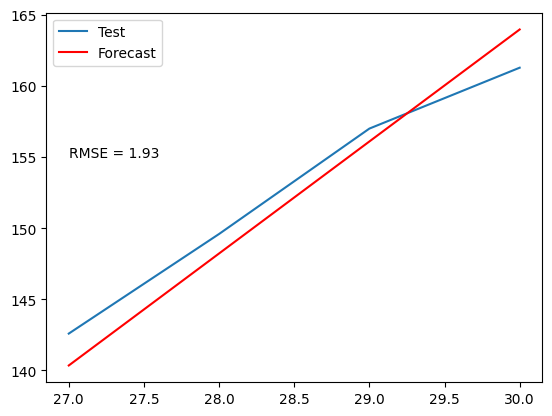

In [117]:
alpha, beta = .8,.19
holt = Holt(y_train)
fit1 = holt.fit(smoothing_level=alpha, smoothing_trend=beta)
fcast1 = fit1.forecast(len(y_test))
y_test.plot(label ='Test')
fcast1.plot(color='red', label='Forecast')
rmse = sqrt(mean_squared_error(y_test, fcast1))
plt.text(27,155,"RMSE = "+ str(np.round(rmse,2)))
plt.legend(loc='best')
plt.show()

# ADFuller Test

In [118]:
from statsmodels.tsa.stattools import adfuller

In [124]:
result = adfuller(milk['Milk'], maxlag=10)
print("P-value = ", result[1])
if result[1] < 0.05:
    print("Time series is stationary")
else:
    print("Time Series is not stationary")

P-value =  0.6443832606930111
Time Series is not stationary


1st order differencing

In [127]:
y = milk['Milk']
diff_1 = y.diff(1)
diff_1.dropna(inplace=True)
result = adfuller(diff_1, maxlag=10)
# result
if result[1] < 0.05:
    print("Time series is stationary")
else:
    print("Time Series is not stationary")

Time series is stationary
